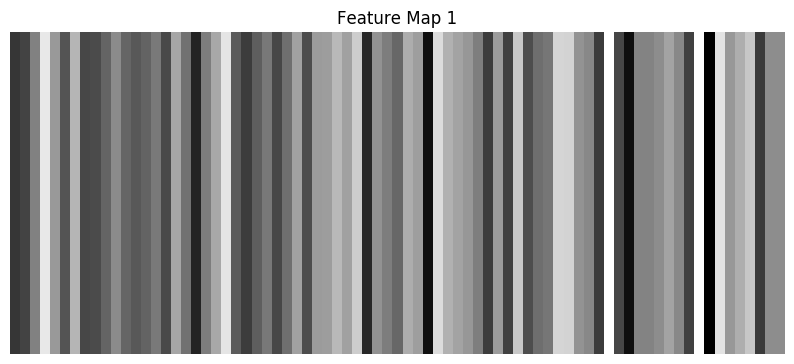

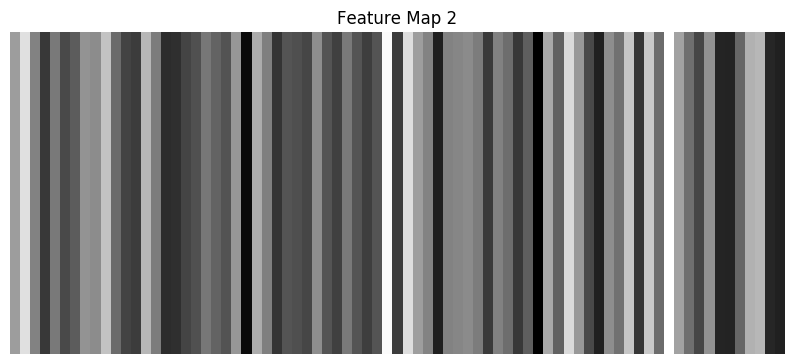

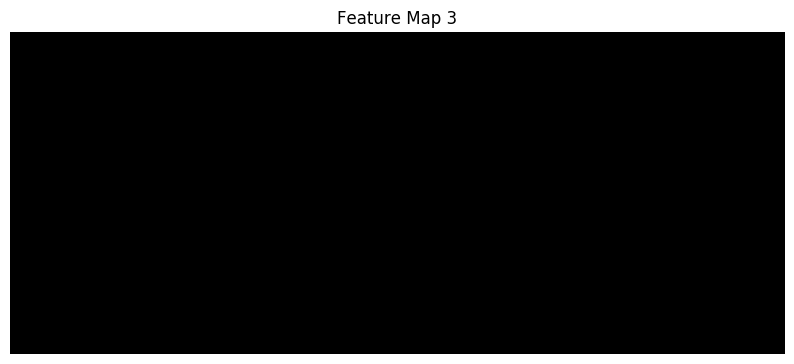

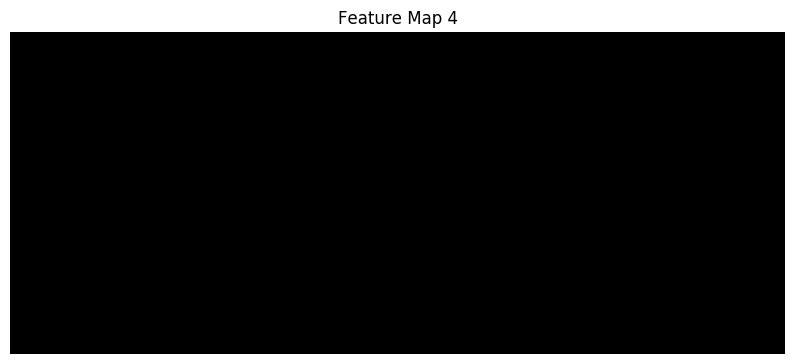

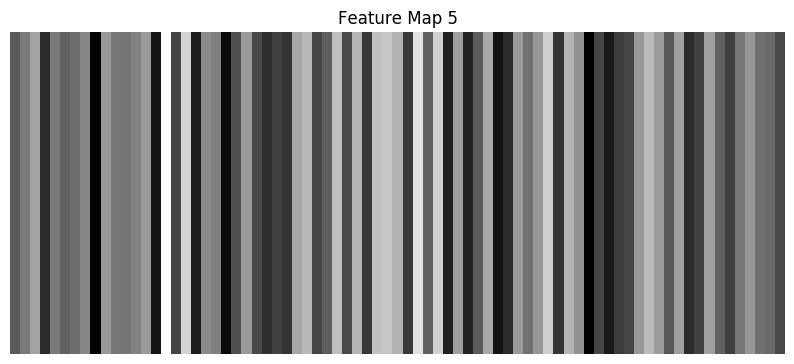

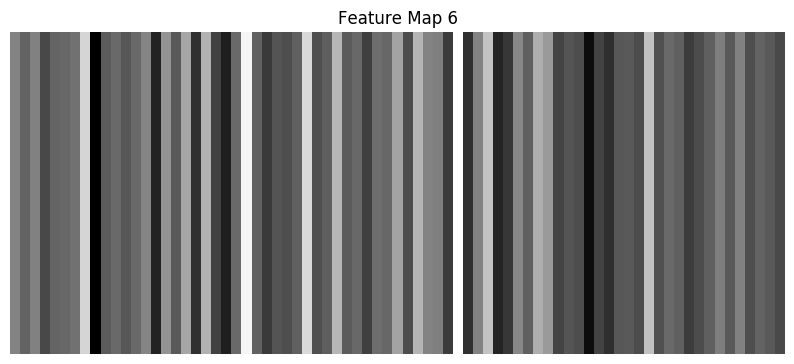

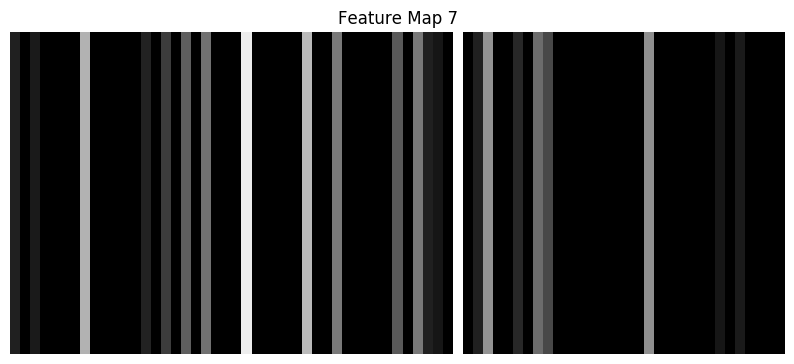

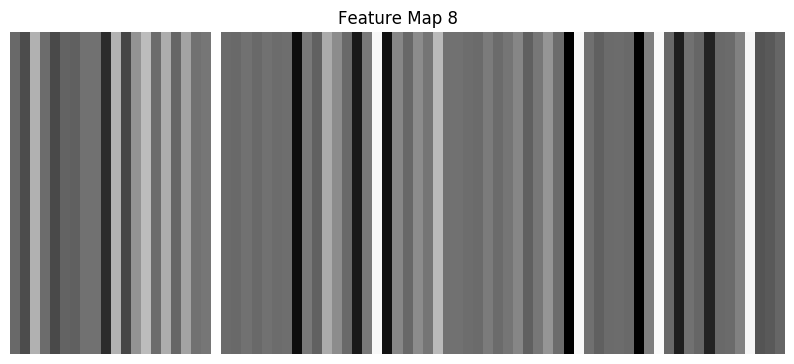

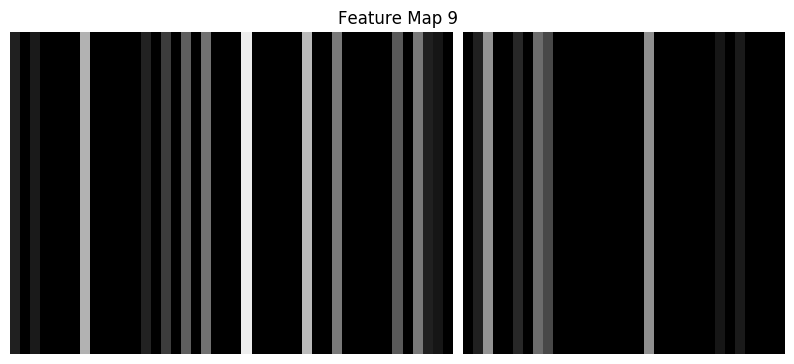

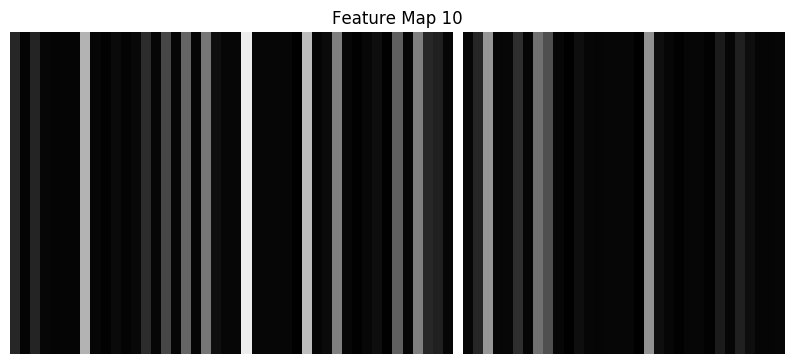

TypeError: Invalid shape (77,) for image data

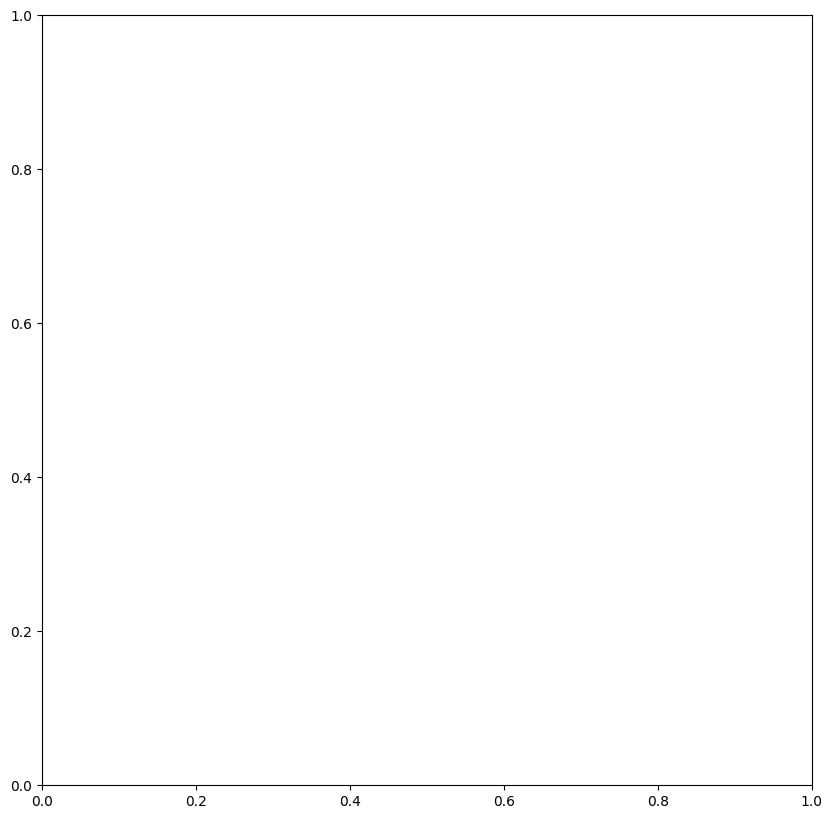

In [5]:
import keras
from keras.models import model_from_json
import numpy as np

model_id = '9b9b33'

# Load the model architecture from the JSON file
with open('data/output/' + model_id + '_arch.json', 'r') as json_file:
    model_arch = json_file.read()
    model = model_from_json(model_arch)

# Load the model weights from the H5 file
model.load_weights('data/output/' + model_id + '_weights.h5')

# Create a feature map for each layer
feature_maps = []
for layer in model.layers[1:]:  # Skip the input layer
    intermediate_layer_model = keras.Model(inputs=model.input, outputs=layer.output)
    feature_map = intermediate_layer_model.predict(np.zeros((1,) + model.input_shape[1:]))
    feature_maps.append(feature_map)

# Plot the feature maps
import matplotlib.pyplot as plt

# Plot the feature maps
for i, feature_map in enumerate(feature_maps):
    plt.figure(figsize=(10, 10))
    plt.imshow(feature_map[0], cmap='gray')
    plt.title(f'Feature Map {i+1}')
    plt.axis('off')
    plt.show()

